#### Name: Sankalp Indish
#### Roll No: BEB75
#### Batch: B4
#### Title:Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.
#### Dataset: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [45]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
# Step 2: Load the dataset (try different encoding if utf-8 fails)
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

In [47]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [48]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [50]:
# Step 3: Select relevant numeric features for clustering
# Example: Total sales based on Quantity Ordered and Price Each
df['Total'] = df['QUANTITYORDERED'] * df['PRICEEACH']
data = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Total']]

In [51]:
# Step 4: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

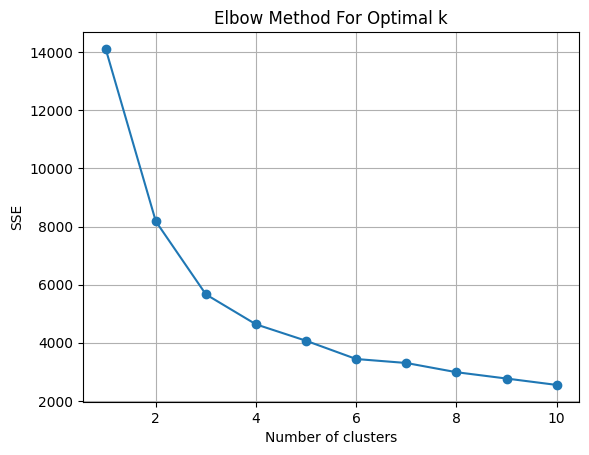

In [52]:
# Step 5: Use the Elbow Method to determine optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [53]:
# Step 6: Apply KMeans with the optimal number of clusters
optimal_k = 4  # Change based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

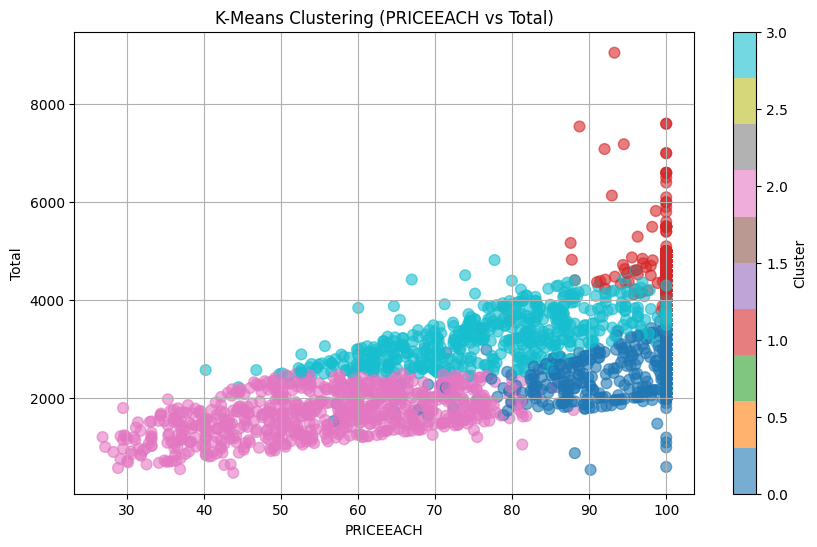

In [54]:
# Step 7: Visualize the clusters
import matplotlib.pyplot as plt

# Scatter plot with centroids
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICEEACH'], df['Total'], c=df['Cluster'], cmap='tab10', alpha=0.6, s=60)
plt.xlabel('PRICEEACH')
plt.ylabel('Total')
plt.title('K-Means Clustering (PRICEEACH vs Total)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


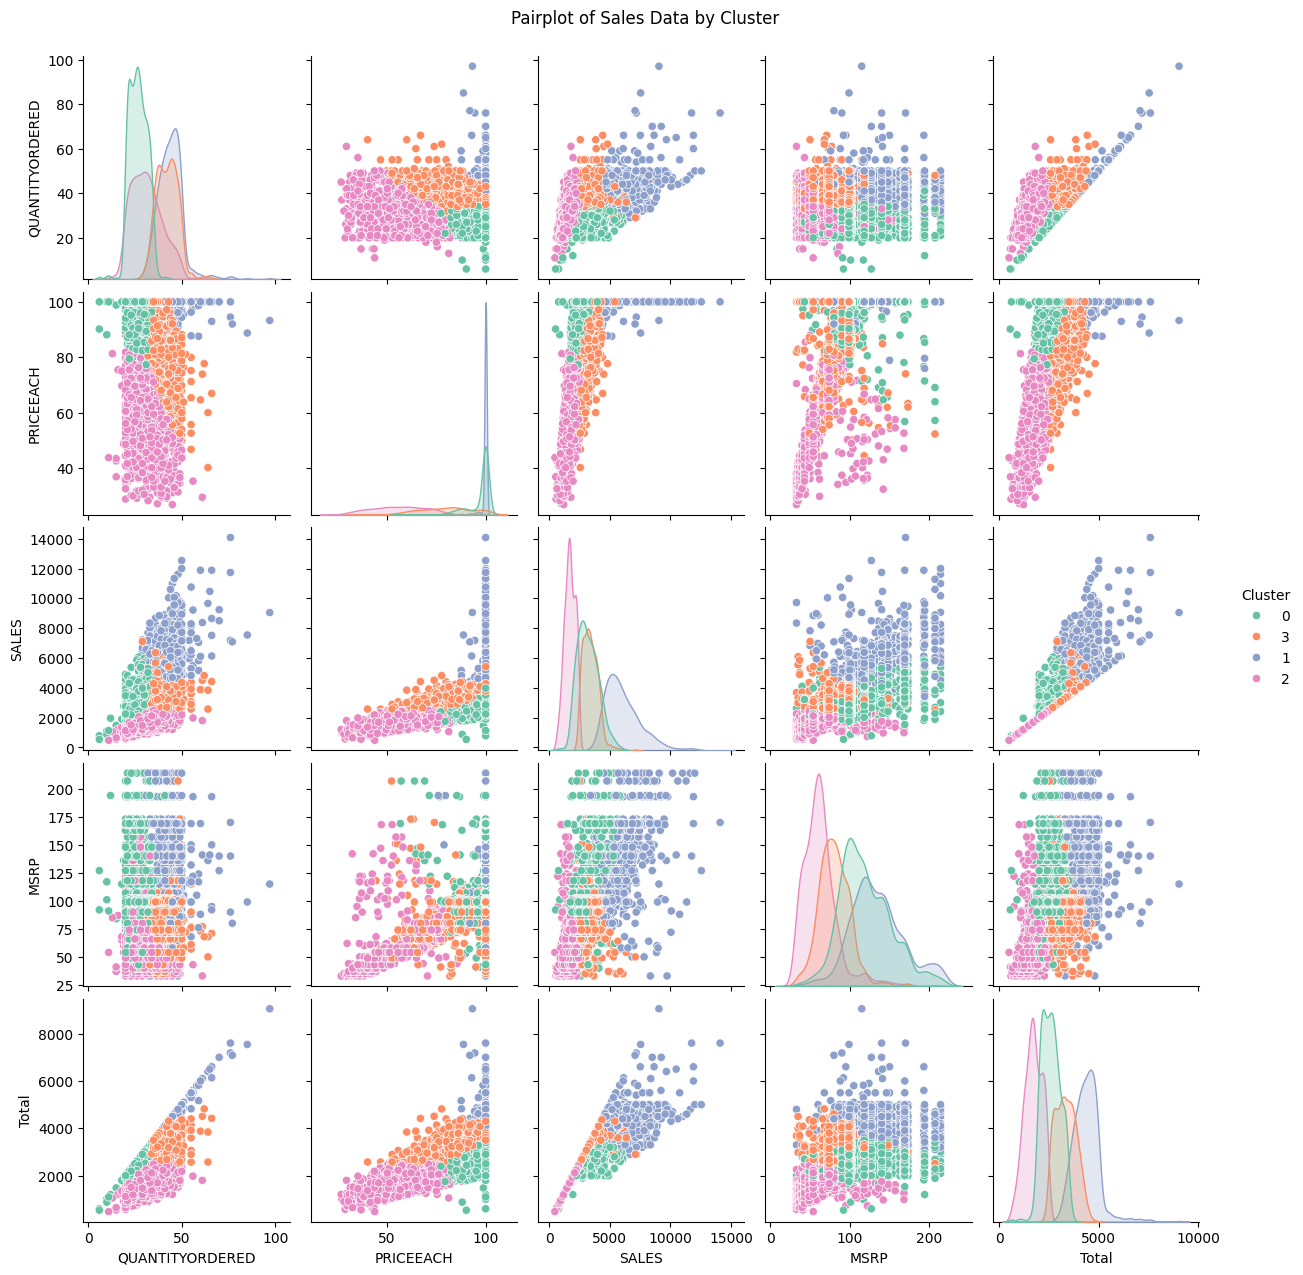

In [55]:
# Define relevant numerical features for clustering visualization
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'Total', 'Cluster']

# Ensure 'Cluster' is treated as a categorical variable for coloring
df['Cluster'] = df['Cluster'].astype(str)

# Create the pairplot
sns.pairplot(df[features], hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Sales Data by Cluster", y=1.02)
plt.show()


### Conclusion

In this experiment, we successfully implemented K-Means clustering on the `sales_data_sample.csv` dataset using Python in Jupyter Notebook. By analyzing key numerical features such as `QUANTITYORDERED`, `PRICEEACH`, `SALES`, `MSRP`, and `Total`, we were able to form distinct customer or product clusters. The optimal number of clusters was determined using the **elbow method**, and meaningful insights were drawn based on **visualizations using pair plots, cluster scatter plots, and 3D plots**. Feature scaling was applied to ensure better performance and accuracy of the clustering algorithm.

Overall, this experiment helped us understand:

* The importance of feature selection in unsupervised learning,
* How K-Means groups similar data points,
* And how to visualize high-dimensional clusters effectively for business intelligence.


In [55]:
# Completed